<a href="https://colab.research.google.com/github/samyukta-15/-LGMVIP-DataScience/blob/main/lgm_iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Flowers Classification ML Project

Intern: Samyukta Vasaikar

Importing Libraries

In [3]:
# scientific computing
import numpy as np

# data manipulation
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# splitting data into training and testing data set
from sklearn.model_selection import train_test_split

#  scale all data features in particular range
from sklearn.preprocessing import MinMaxScaler

# model selection
from sklearn.neighbors import KNeighborsClassifier

# model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Understanding Data

In [4]:
# reading data from csv file

iris = pd.read_csv('iris.csv')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [5]:
# display first 5 rows of given dataset

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# (rows, columns)

iris.shape

(150, 5)

In [7]:
# list of columns

iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
# non-null count and datatypes

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# statistical calculation data 

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# number of non-null values in each column

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# assigning different color values to different species

color = []

for item in iris['species']:
  if item == 'Iris-versicolor':
    color.append(0)

  elif item == 'Iris-virginica':
    color.append(1)

  elif item == 'Iris-setosa':
    color.append(2)

# print(color)

Data Visualisation

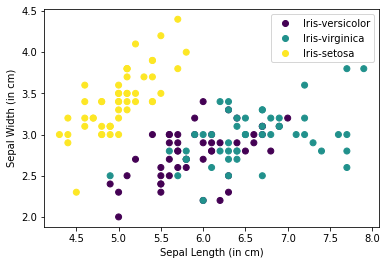

In [12]:
# plotting a scatter graph on basis of sepal length and sepal width

scatter = plt.scatter(iris['sepal_length'],iris['sepal_width'],c=color)

species_name = ['Iris-versicolor','Iris-virginica','Iris-setosa']
plt.legend(handles = scatter.legend_elements()[0],labels=species_name)

plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.show()

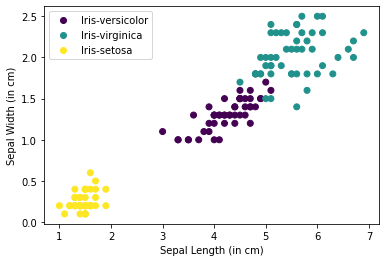

In [13]:
# plotting a scatter graph on basis of petal length and petal width

scatter = plt.scatter(iris['petal_length'],iris['petal_width'],c=color)

species_name = {'Iris-versicolor':0,'Iris-virginica':1,'Iris-setosa':2}
plt.legend(handles = scatter.legend_elements()[0],labels=species_name)

plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.show()

Preparing Data

In [14]:
# all rows, and all columns except specie-names
x = iris.iloc[:,[0,1,2,3]].values

# all rows and column i.e specie-names
y = iris.iloc[:,4].values

Splitting Data

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Scaling Data

In [16]:
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

Training Data

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

Predicting Data

In [18]:
y_pred = knn.predict(x_test)

Model Evaluation

In [19]:
accuracy = accuracy_score(y_pred,y_test)*100
print(accuracy)

100.0


In [20]:
print(confusion_matrix(y_pred,y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [21]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

